## Assignment 2

### Event 
Dividend Increase, Buyback Transaction Announcements

Situation: Microsoft Corp. announced that its board of directors approved an 0.08 per share quarterly dividend. Under the plan approved by the Microsoft board, the company will move from its current annual dividend of $0.16 per share to a quarterly dividend of 0.08 per share, which would essentially double the annual dividend to approximately 3.5 billion, if continued at that level. The company will also pay a one-time special dividend of 3 per share, or 32 billion, subject to shareholder approval of stock plan amendments that will allow certain adjustments to employee equity compensation awards to offset the impact of this large one-time payout. 



### Event Details 
* Announcement Date : July 20,2004 
* Event Period : July 16,2004 through July 23,2004
* Estimation Period : July 21,2003 Through January July 2,2004



### Days taken in consideration to study event
* Data were collected from yahoo Finance. T
* The Market Model in (A) is used as the benchmark model.

* Estimation period : 240 days 
* Announcement Date : 20-July-2004 
* Observation_window : (-10,+10)
* buffer_size = 10

### Hypothesis

* Null Hypothesis : Divident event does not have any impact on Stock returns
* Alternate Hypothesis :  Divident event does have imapct on Stock Returns


In [55]:
## Import Libraries 
import datetime
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import numpy as np

In [61]:
df_ = yf.download("SBIN.NS", start="2010-01-01", end="2021-04-30")

## Normal Return
#df_["Close_return"] = df_["Close"].pct_change()
## Log return 
df_["Close_return"]  = np.log(df_.Close) - np.log(df_.Close.shift(1))
df_ = df_.dropna(axis=0)
df_.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Close_return
Date,,,,,,,
2010-01-05,230.800003,231.000000,228.009995,229.205002,204.580460,11613740,0.000371
2010-01-06,229.699997,231.500000,228.500000,230.580002,205.807755,14527930,0.005981
2010-01-07,230.600006,231.000000,228.110001,229.289993,204.656342,8576510,-0.005610
2010-01-08,229.399994,230.389999,228.009995,228.604996,204.044922,10453820,-0.002992
2010-01-11,229.699997,231.270004,226.324997,226.720001,202.362457,14145340,-0.008280
2010-01-12,226.699997,227.000000,219.619995,220.320007,196.650009,22917720,-0.028635
2010-01-13,219.500000,219.500000,215.809998,217.589996,194.213318,21719690,-0.012469
2010-01-14,218.800003,219.899994,214.554993,215.735001,192.557602,20723990,-0.008562
2010-01-15,216.800003,217.839996,213.679993,214.335007,191.308044,20611920,-0.006511


In [62]:
df_["SMA10"] = df_.Close_return.rolling(10, min_periods=1).mean()
df_["SMA10"]
df_.head(30)

,Open,High,Low,Close,Adj Close,Volume,Close_return,SMA10
Date,,,,,,,,
2010-01-05,230.800003,231.000000,228.009995,229.205002,204.580460,11613740,0.000371,0.000371
2010-01-06,229.699997,231.500000,228.500000,230.580002,205.807755,14527930,0.005981,0.003176
2010-01-07,230.600006,231.000000,228.110001,229.289993,204.656342,8576510,-0.005610,0.000247
2010-01-08,229.399994,230.389999,228.009995,228.604996,204.044922,10453820,-0.002992,-0.000563
2010-01-11,229.699997,231.270004,226.324997,226.720001,202.362457,14145340,-0.008280,-0.002106
2010-01-12,226.699997,227.000000,219.619995,220.320007,196.650009,22917720,-0.028635,-0.006527
2010-01-13,219.500000,219.500000,215.809998,217.589996,194.213318,21719690,-0.012469,-0.007376
2010-01-14,218.800003,219.899994,214.554993,215.735001,192.557602,20723990,-0.008562,-0.007524
2010-01-15,216.800003,217.839996,213.679993,214.335007,191.308044,20611920,-0.006511,-0.007412


In [46]:
# calculate stock and market returns
df_ = df.pct_change().dropna()

# set event window and estimation period
df_event = df_.head(261).tail(21).reset_index()
df_estimation = df_.head(240).reset_index()

In [47]:
# estimating benchmark(Market Model)
X = sm.add_constant(df_estimation['MKT'])
Y = df_estimation['MSFT']
reg = sm.OLS(Y, X).fit()
df_event["Alpha"] = reg.params["const"]
df_event["Beta"] = reg.params["MKT"]
print ("Alpha  value : {} and Beta value is : {}".format ( reg.params["const"] , reg.params["MKT"] ))

Alpha  value : -0.00022673263969659701 and Beta value is : 1.1597677918114995


In [49]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.28e-28
Time:                        23:57:01   Log-Likelihood:                 751.01
No. Observations:                 240   AIC:                            -1498.
Df Residuals:                     238   BIC:                            -1491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.329      0.742      -0.002       0.001
MKT            1.1598      0.093     12.509      0.000       0.977       1.342
==============================================================================
Omnibus:                       66.171   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1763.283
Skew:                          -0.265   Prob(JB):                         0.00
Kurtosis:                      16.268   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
## Calculation of Abnormal Return and Cumulative Abmormal return 
df_event["AR"] = df_event.apply(lambda x :  x["MSFT"] - x["Alpha"] - x["Beta"]*x["MKT"],axis =1 )
df_event["CAR"] = df_event["AR"].cumsum()

## Calculation of Standard Deviation
df_event["AR Std.Deviation"] = df_event["AR"].std()
df_event["CAR Std.Deviation"] = [(i * var) for i, var in enumerate(df_event["AR Std.Deviation"], 1)]

## Calculation of T-Statitics
df_event["TStat_AR"] = df_event.apply(lambda x : x["AR"]/x["AR Std.Deviation"],axis =1 )
df_event["TStat_CAR"] = df_event.apply(lambda x : x["CAR"]/x["CAR Std.Deviation"],axis =1 )

## Event Significance 
df_event["eventtime"] = np.arange(-10,11)
df_event["Signifiace_AR_TStat"] = df_event["TStat_AR"].apply(lambda x :"Yes" if abs(x) > 1.96 else "No")
df_event["Signifiace_CAR_TStat"] = df_event["TStat_CAR"].apply(lambda x :"Yes" if abs(x) > 1.96 else "No")
df_event =  df_event.set_index(["eventtime"])
df_event = df_event.reset_index()

#df_event.to_excel('event_Stat.xls')
df_event

,eventtime,Date,MSFT,MKT,Alpha,Beta,AR,CAR,AR Std.Deviation,CAR Std.Deviation,TStat_AR,TStat_CAR,Signifiace_AR_TStat,Signifiace_CAR_TStat
0,-10,2004-07-06,-0.019251,-0.008148,-0.000227,1.159768,-0.009574,-0.009574,0.014302,0.014302,-0.669404,-0.669404,No,No
1,-9,2004-07-07,0.002855,0.001899,-0.000227,1.159768,0.000879,-0.008695,0.014302,0.028604,0.061467,-0.303969,No,No
2,-8,2004-07-08,-0.016370,-0.008244,-0.000227,1.159768,-0.006582,-0.015277,0.014302,0.042907,-0.460195,-0.356044,No,No
3,-7,2004-07-09,0.007960,0.003336,-0.000227,1.159768,0.004317,-0.010959,0.014302,0.057209,0.301854,-0.191570,No,No
4,-6,2004-07-12,0.001077,0.001384,-0.000227,1.159768,-0.000301,-0.011261,0.014302,0.071511,-0.021073,-0.157470,No,No
5,-5,2004-07-13,-0.010398,0.000709,-0.000227,1.159768,-0.010993,-0.022254,0.014302,0.085813,-0.768655,-0.259334,No,No
6,-4,2004-07-14,0.019203,-0.003291,-0.000227,1.159768,0.023247,0.000992,0.014302,0.100115,1.625379,0.009910,No,No
7,-3,2004-07-15,-0.009243,-0.004301,-0.000227,1.159768,-0.004028,-0.003036,0.014302,0.114418,-0.281654,-0.026535,No,No
8,-2,2004-07-16,-0.013994,-0.004789,-0.000227,1.159768,-0.008213,-0.011249,0.014302,0.128720,-0.574229,-0.087390,No,No
9,-1,2004-07-19,0.017103,-0.000445,-0.000227,1.159768,0.017846,0.006597,0.014302,0.143022,1.247786,0.046128,No,No


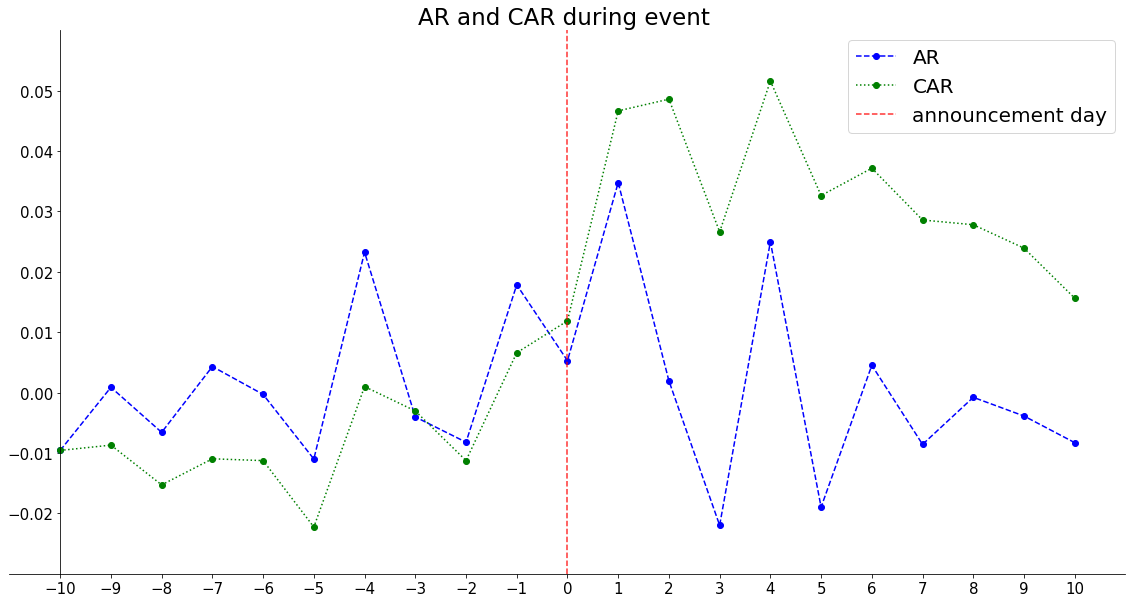

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
plt.xticks(np.arange(-10, 10+1, step=1)) 
plt.yticks(np.arange(round(df_event["AR"].min(),2),round(df_event["CAR"].max(),2),step=0.010))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data',-0.03))
ax.spines['left'].set_position(('data',-10))
ax.plot( df_event["eventtime"],df_event["AR"],'--m', color = 'blue', marker = 'o' , label='AR')
ax.plot( df_event["eventtime"],df_event["CAR"],':b', color = 'green',marker = 'o',label='CAR')
plt.axvline(0, color='r', linestyle='--', label='announcement day',alpha=0.8)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=15)
plt.ylim(-0.03,0.06)
plt.title("AR and CAR during event ",fontsize = 23)
#plt.savefig('AR and CAR of MSFT during Event Window')
plt.show()

### Event Study Analysis : 
1. We support alertnative hypothesis on the given case as dividend activity has positive impact on stock price which is supported by abnormal returns spiked during the period. 
2. Addionally we observed, CAR  is positive for the microsoft for the given period 
3. High AR on eventdate ( 20/07/2004 ) + 1 states that event has significant impact on stock return and it also help to point out that market is not efficient
4. Leakage of information : 
    * During the observation period information leak from t = -2 noticed as CAR started increasing untill event date +2 
5. CAR later drop to zero which could be because of excessive trading or price pressure.  

In [ ]:
# thanks for watching!